In [1]:
import readline

In [2]:
execfile('/u01/bdd/v1.3.2/BDD-1.3.2.35.1091/bdd-shell/ipython/00-bdd-shell-init.py')

In [3]:
%load_ext rpy2.ipython

In [4]:
dss = bc.datasets()
for ds in dss:
    print('Name: %s\tKey:%s'%(ds.properties()['displayName'], ds.properties()['databaseKey'] ))

Name: media_demo_customer	Key:default_edp_89c616b6-aa10-4827-aa82-1e9c3fcc419e
Name: media_demo_customer	Key:edp_cli_edp_2c7f41ee-65bf-43ac-8bb4-5b6b59a55d75
Name: media_demo_customer	Key:default_edp_c78bef3e-5e71-4ef9-8760-5b23d4a02848
Name: media_demo_movielog	Key:default_edp_f343a63a-4cc3-449c-a0a0-d4b50c3d0849
Name: arima_zhk_40gp_mtrtn_1	Key:edp_cli_edp_6748d213-4139-415d-9939-16ed90c2faaa
Name: arima_zhk_40gp_mtrtn	Key:edp_cli_edp_f5b84e48-6253-43dd-845c-e57f9fc9b075
Name: arima_zhk_40gp_mtrtn_1	Key:default_edp_9a99541a-9173-457a-879c-170477e0bc96
Name: movie_genre_2	Key:default_edp_d17f911d-eea0-4788-af6f-615f483bc978
Name: MT_RLS_RTN	Key:default_edp_db966636-a062-4ed5-8595-7d53cc448d50
Name: movie_genre	Key:default_edp_7d4c18a5-6f02-4067-9f63-91f950078b1e
Name: MT_RLS_RTN	Key:default_edp_5beef038-dafc-4adf-abb9-c86188fef66e
Name: POR-FND-LT v3b	Key:default_edp_c96c2689-acc5-4757-8d16-0b7129a13b90
Name: media_3rdparty_activity	Key:default_edp_ae82f0cb-5a27-42c5-a423-c726f0f256c9

In [5]:
ds = dss.dataset('default_edp_5efd9422-e38b-4623-af0f-bd5913fd8dbf')

In [6]:
spark_df = ds.to_spark()
spark_df.printSchema()

root
 |-- total_teu: long (nullable = true)
 |-- total_teu_by_year: long (nullable = true)
 |-- PRIMARY_KEY: string (nullable = false)
 |-- frequency__: double (nullable = true)
 |-- cus_id: string (nullable = true)
 |-- frequency: long (nullable = true)
 |-- year: long (nullable = true)
 |-- total_teu__: double (nullable = true)



In [7]:
import pandas as pd
pandas_df = spark_df.toPandas()

In [8]:
%%R -i pandas_df

R.df <- pandas_df

summary(R.df)

   total_teu      total_teu_by_year   PRIMARY_KEY    frequency__     
 Min.   :   0.0   Min.   : 61168    0-0-0   :   1   Min.   :0.00000  
 1st Qu.:   0.0   1st Qu.:154203    0-0-1   :   1   1st Qu.:0.00000  
 Median :   1.0   Median :185344    0-0-10  :   1   Median :0.01923  
 Mean   :  81.7   Mean   :158664    0-0-100 :   1   Mean   :0.15306  
 3rd Qu.:  16.0   3rd Qu.:189804    0-0-1000:   1   3rd Qu.:0.15385  
 Max.   :9913.0   Max.   :202801    0-0-1001:   1   Max.   :1.00000  
                                    (Other) :7762                    
        cus_id       frequency           year       total_teu__       
 3000272000:   4   Min.   : 0.000   Min.   :2013   Min.   :0.0000000  
 3000790000:   4   1st Qu.: 0.000   1st Qu.:2014   1st Qu.:0.0000000  
 3001236000:   4   Median : 1.000   Median :2014   Median :0.0000050  
 3001520000:   4   Mean   : 6.569   Mean   :2014   Mean   :0.0005149  
 3001774000:   4   3rd Qu.: 6.000   3rd Qu.:2015   3rd Qu.:0.0001080  
 3001775001:  

In [9]:
%%R
#install.packages("dplyr")
library(dplyr)
library(cluster)
library(ggplot2)
library(corrplot)

/u01/anaconda2/lib/python2.7/site-packages/rpy2-2.8.4-py2.7-linux-x86_64.egg/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/u01/anaconda2/lib/python2.7/site-packages/rpy2-2.8.4-py2.7-linux-x86_64.egg/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/u01/anaconda2/lib/python2.7/site-packages/rpy2-2.8.4-py2.7-linux-x86_64.egg/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/u01/anaconda2/lib/python2.7/site-packages/rpy2-2.8.4-py2.7-linux-x86_64.egg/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  warnings.warn(x, RRuntimeWarning)


In [10]:
%%R
View(R.df)

In [11]:
%%R
nrow(R.df)

[1] 7768


In [12]:
%%R
summary(R.df)

   total_teu      total_teu_by_year   PRIMARY_KEY    frequency__     
 Min.   :   0.0   Min.   : 61168    0-0-0   :   1   Min.   :0.00000  
 1st Qu.:   0.0   1st Qu.:154203    0-0-1   :   1   1st Qu.:0.00000  
 Median :   1.0   Median :185344    0-0-10  :   1   Median :0.01923  
 Mean   :  81.7   Mean   :158664    0-0-100 :   1   Mean   :0.15306  
 3rd Qu.:  16.0   3rd Qu.:189804    0-0-1000:   1   3rd Qu.:0.15385  
 Max.   :9913.0   Max.   :202801    0-0-1001:   1   Max.   :1.00000  
                                    (Other) :7762                    
        cus_id       frequency           year       total_teu__       
 3000272000:   4   Min.   : 0.000   Min.   :2013   Min.   :0.0000000  
 3000790000:   4   1st Qu.: 0.000   1st Qu.:2014   1st Qu.:0.0000000  
 3001236000:   4   Median : 1.000   Median :2014   Median :0.0000050  
 3001520000:   4   Mean   : 6.569   Mean   :2014   Mean   :0.0005149  
 3001774000:   4   3rd Qu.: 6.000   3rd Qu.:2015   3rd Qu.:0.0001080  
 3001775001:  

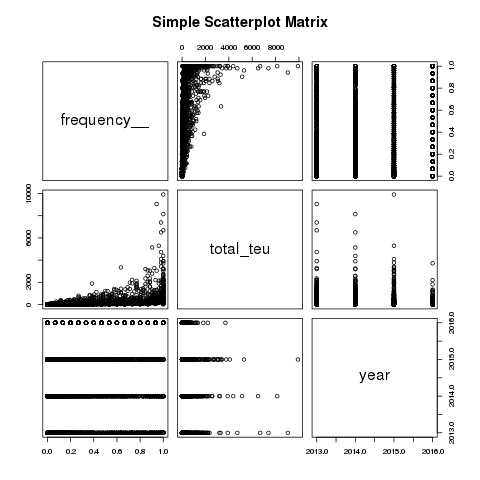

In [13]:
%%R
pairs(~frequency__+total_teu+year, data=R.df, main="Simple Scatterplot Matrix")

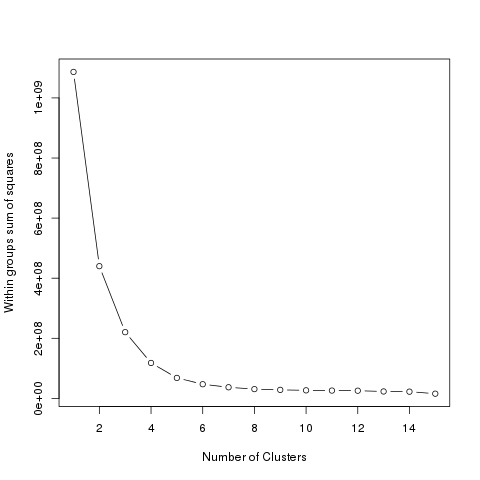

In [14]:
%%R
wssplot <- function(data, nc=15, seed=1234) {
    wss <- (nrow(data)-1)*sum(apply(data,2,var))
    for (i in 2:nc) {
        set.seed(seed)
        wss[i] <- sum(kmeans(data,centers=i)$withinss)
    }
    plot(1:nc, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
}

colOperates_LG = c("frequency__", "total_teu", "year")
wssplot(R.df[,colOperates_LG], nc = 15)

In [15]:
%%R
require(cluster)
km <- function(data, colOperates, nc = 15){
    kmDataSet <- data[,colOperates]
    clusters <- kmeans(kmDataSet, centers = nc, iter.max = 100)
    clusters
}

km.cluster <- km(R.df, colOperates_LG, 6)
cluster <- factor(km.cluster$cluster)
R.df <- cbind(cluster, R.df)
View(R.df)
centers <- as.data.frame(km.cluster$centers)
km.cluster$size

[1]   58 7125  421   20  138    6


In [16]:
%%R
View(R.df)


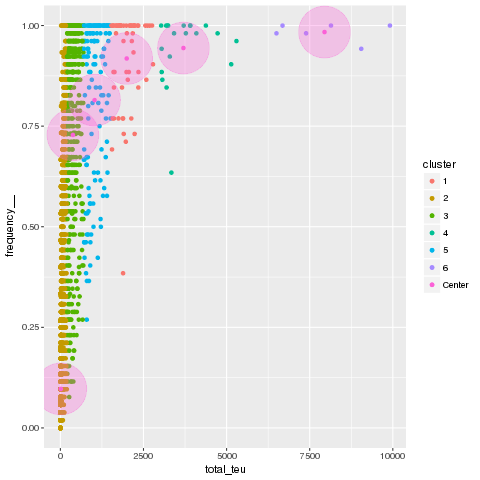

In [17]:
%%R
require(ggplot2)
ggplot(data=R.df, aes(x=total_teu, y=frequency__, color=cluster)) +
geom_point() + 
geom_point(data=centers, aes(x=total_teu, y=frequency__, color='Center')) + 
geom_point(data=centers, aes(x=total_teu, y=frequency__, color='Center'), size=24, alpha=0.3, show.legend=FALSE) 

In [18]:
%%R -o R_output

R_output <- 
    R.df 

In [19]:
R_output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7768 entries, 0 to 7767
Data columns (total 9 columns):
cluster              7768 non-null object
total_teu            7768 non-null int32
total_teu_by_year    7768 non-null int32
PRIMARY_KEY          7768 non-null object
frequency__          7768 non-null float64
cus_id               7768 non-null object
frequency            7768 non-null int32
year                 7768 non-null int32
total_teu__          7768 non-null float64
dtypes: float64(2), int32(4), object(3)
memory usage: 485.5+ KB


In [20]:
R_output.head()

,cluster,total_teu,total_teu_by_year,PRIMARY_KEY,frequency__,cus_id,frequency,year,total_teu__
0,2,0,185472,0-0-0,0.000000,99999,0,2013,0.000000
1,2,0,185215,0-0-1,0.000000,99999,0,2014,0.000000
2,2,28,202801,0-0-2,0.019231,99999,1,2015,0.000138
3,2,76,61168,0-0-3,0.600000,99999,9,2016,0.001242
4,2,53,185472,0-0-4,0.250000,3000272000,13,2013,0.000286


In [ ]:
spark_df2 = sqlContext.createDataFrame(R_output)
spark_df2.printSchema()

root
 |-- cluster: string (nullable = true)
 |-- total_teu: long (nullable = true)
 |-- total_teu_by_year: long (nullable = true)
 |-- PRIMARY_KEY: string (nullable = true)
 |-- frequency__: double (nullable = true)
 |-- cus_id: string (nullable = true)
 |-- frequency: long (nullable = true)
 |-- year: long (nullable = true)
 |-- total_teu__: double (nullable = true)



In [ ]:
spark_df2.write.mode('Overwrite').saveAsTable('default.CustomerOnlyByYearWithCluster')

In [ ]:
#Below remarked.  
#Per Steven's sharing, there will be a schedule job to detect any new Hive table and then create a new dataset and ingest back into BDD.

#from subprocess import call
#call(["/u01/bdd/v1.3.2/BDD-1.3.2.35.1091/dataprocessing/edp_cli/data_processing_CLI","--table default.CustomerOnlyByYearWithCluster"])